# Splitting data into training and testing

 Total: 1306122

In [9]:
import pandas as pd

filepath_train = '../dev_data/cleaned_data/train.csv'
df_train = pd.read_csv(filepath_train,index_col=0)
print('training dataset size: ',df_train.shape)

training dataset size:  (835828, 9)


In [10]:
df_train = pd.read_csv('../dev_data/cleaned_data/train.csv',index_col=0)
df_valid = pd.read_csv('../dev_data/cleaned_data/valid.csv',index_col=0)
df_test = pd.read_csv('../dev_data/cleaned_data/test.csv',index_col=0)

In [11]:
print(df_train.shape,df_valid.shape,df_test.shape)

(835828, 9) (209011, 9) (261257, 4)


In [19]:
import numpy as np
msk = np.random.rand(len(df_train)) < 0.125

df_train_filtered = df_train[np.random.rand(len(df_train)) < 0.125]
df_valid_filtered = df_valid[np.random.rand(len(df_valid)) < 0.125]
df_test_filtered = df_test[np.random.rand(len(df_test)) < 0.08]


In [20]:
print(df_train_filtered.shape,df_valid_filtered.shape,df_test_filtered.shape)

(104716, 9) (26368, 9) (20877, 4)


In [21]:
df_train_filtered.to_csv('train_0125.csv')
df_valid_filtered.to_csv('valid_0125.csv')
df_test_filtered.to_csv('test_0125.csv')

# Save new split training and testing data

In [ ]:
df_train['qid_base_hex'] = df_train.index
df_train['qid_base_ten'] = df_train['qid_base_hex'].apply(lambda x : int(x, 16))

msk = np.random.rand(len(df_train)) < 0.8

train = df_train[msk][['question_text','target']]
test = df_train[~msk][['question_text','target']]

train.to_csv('../data/mytrain.csv')
test.to_csv('../data/mytest.csv')

# Read from train and test data and visualize them

In [ ]:
df_train = pd.read_csv('../data/mytrain.csv')
df_test = pd.read_csv('../data/mytest.csv')

In [ ]:
df_train['train_test'] = 'train'
df_test['train_test'] = 'test'
df = pd.concat([df_train, df_test])
df['qid_base_ten'] = df['qid'].apply(lambda x : int(x, 16))


min_qid = df['qid_base_ten'].min()
df['qid_base_ten_normalized'] = df['qid_base_ten'].apply(lambda x : (x - min_qid)/min_qid)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()
plt.figure(figsize=(18, 8));
plt.scatter(x=df[df['train_test']=='train']['qid_base_ten_normalized'], y=[1]*df[df['train_test']=='train'].shape[0], label='Train', s=300);
plt.scatter(x=df[df['train_test']=='test']['qid_base_ten_normalized'], y=[1]*df[df['train_test']=='test'].shape[0], label='Test',s=2);
plt.xlabel('qid_base_ten_normalized');
plt.ylabel('N/A');
plt.title('qid_base_ten_normalized for train and test datasets')
plt.legend()
plt.show()

# Finally the reading of training and testing data would be:

In [ ]:
import pandas as pd
df_train = pd.read_csv('../data/mytrain.csv')
df_test = pd.read_csv('../data/mytest.csv')
# or read qid as index:
# df_train = pd.read_csv('../../data/mytrain.csv',index_col=0)
# df_test = pd.read_csv('../../data/mytest.csv',index_col=0)

# Stats over corpus

In [ ]:
sentences = df_train['question_text'].values
sen_len = [len(line.split()) for line in sentences]

In [6]:
token_len = df_train.token_len.values
print('Min len:',min(token_len))
print('Max len:',max(token_len))

Min len: 1
Max len: 16


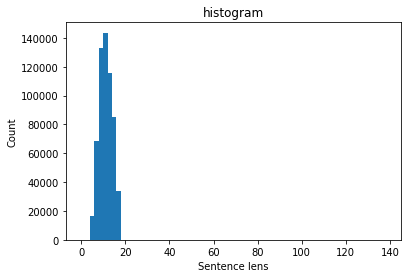

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt



plt.hist(token_len, bins =  np.arange(0,140,2)) 
plt.title("histogram") 
plt.xlabel('Sentence lens')
plt.ylabel('Count')
plt.show()

In [8]:
sum(token_len<=14)

523299

In [4]:
df_train = pd.read_csv('../dev_data/cleaned_data/train.csv',index_col=0)
df_valid = pd.read_csv('../dev_data/cleaned_data/valid.csv',index_col=0)
df_test = pd.read_csv('../dev_data/cleaned_data/test.csv',index_col=0)

In [5]:
print(df_train.shape,df_valid.shape,df_test.shape)

(835828, 9) (209011, 9) (261257, 4)


In [14]:
token_len = list(df_train.token_len.values)
import numpy as np
res=[]
for i in np.arange(10,20,1):
    res.append(sum(token_len<i)/len(token_len))
print(res)

[0.2608012653321018, 0.34903831888857517, 0.432684715037065, 0.506616193762353, 0.5710361461927573, 0.6260845532812971, 0.6731145642404897, 0.7133094368697867, 0.7477363763836579, 0.7772711610522739]


In [15]:
for i in range(len(res)):
    print(i+10, res[i])

10 0.2608012653321018
11 0.34903831888857517
12 0.432684715037065
13 0.506616193762353
14 0.5710361461927573
15 0.6260845532812971
16 0.6731145642404897
17 0.7133094368697867
18 0.7477363763836579
19 0.7772711610522739


In [16]:
token_len = list(df_valid.token_len.values)
import numpy as np
res=[]
for i in np.arange(10,20,1):
    res.append(sum(token_len<i)/len(token_len))

for i in range(len(res)):
    print(i+10, res[i])

10 0.2629191765026721
11 0.350900191855931
12 0.434809651166685
13 0.5091215294888786
14 0.5733956586017004
15 0.6287946567405543
16 0.6757156321916071
17 0.7152733588184353
18 0.7493672581825837
19 0.778533187248518


In [26]:
df_train = df_train[df_train['token_len']<=16]
df_valid = df_valid[df_valid['token_len']<=16]

In [27]:
print(df_train.shape,df_valid.shape)

(596204, 9) (149500, 9)


In [28]:
df_train.to_csv('train.csv')
df_valid.to_csv('valid.csv')

In [ ]:
import re
tokenized_sen = [re.findall(r"\w+|[^\w\s]", text, re.UNICODE) for text in sentences]
token_len = [len(e) for e in tokenized_sen]
print('Min len:',min(token_len))
print('Max len:',max(token_len))

In [2]:
token_len = df_train.token_len.values
print('Min len:',min(token_len))
print('Max len:',max(token_len))

Min len: 1
Max len: 100


In [3]:
token_len = list(token_len)

In [ ]:
token_len.sort()
x = range(len(token_len))
y = []
prev = 0
for e in x[:10000]:
    if e%1000==0:
        print(e)
    try:
#         prev = token_len.index(e)
        y.append(token_len.index(e))
    except:
        y.append(prev)

y_percent = [e/len(token_len) for e in y]


0


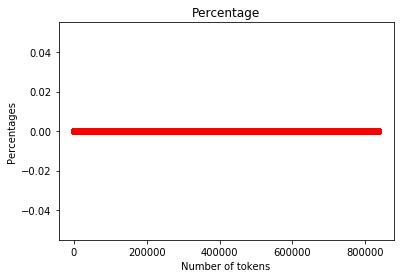

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y_percent, 'ro')
plt.title("Percentage") 
plt.xlabel('Number of tokens')
plt.ylabel('Percentages')
plt.show()

`(1-y_percentage[100])*len(token_len) = 22`, which means only about 22 sentences are longer than 100 tokens

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>


# Starting with mytrain.csv and mytest.csv

## labels of samples with \[math\] that need to be modified

1. Proper math questions that were classified as insincere by Quora:  
`[[22402,0],
[30914,0],
[101048,0],
[131075,0],
[134731,0],
[185318,0],
[224464,0],
[262046,0],
[267327,0],
[354833,0],
[405552,0],
[407980,0],
[422950,0],
[583645,0], 
[584827,0],
[649125,0],
[731531,0],
[848889,0],
[875208,0], 
[930275,0], 
[972559,0], 
[976850,0], 
[1007192,0], 
[1012853,0], 
[1044032,0]]`

2. To change the label accordingly

In [ ]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('../data/mytrain.csv')
list_to_be_handled = [[22402,0],
[30914,0],
[101048,0],
[131075,0],
[134731,0],
[185318,0],
[224464,0],
[262046,0],
[267327,0],
[354833,0],
[405552,0],
[407980,0],
[422950,0],
[583645,0], 
[584827,0],
[649125,0],
[731531,0],
[848889,0],
[875208,0], 
[930275,0], 
[972559,0], 
[976850,0], 
[1007192,0], 
[1012853,0], 
[1044032,0]]
for [ind, target] in list_to_be_handled:
    print('%d orginal target %d changing to ' % (ind,df_train.iloc[ind].target),end='')
    df_train.loc[ind,'target'] = target
    print(df_train.iloc[ind].target)

3. Remove sentences with newline characters

In [ ]:
sentences = df_train['question_text'].values
is_newline = [1 if '\n' in e else 0 for e in sentences] # there are 6 sentences containing \n
df_train_newline_removed = df_train[~df_train.question_text.str.contains('\n')]

4. Since there are around 20 sentences with more than 100 tokens, to speed up training process, remove them

In [ ]:
import re
########################### following code compares regex vs spacy in terms of tokenization
tokens = [re.findall(r"\w+|[^\w\s]", text, re.UNICODE) for text in df_train_newline_removed.question_text.values]

from allennlp.data.tokenizers.word_splitter import SpacyWordSplitter

def tokenizer(x: str):
    return [w.text for w in
        SpacyWordSplitter(language='en_core_web_sm', pos_tags=False).split_words(x)]

tokens_spacy=[]
for i in range(len(df_train_newline_removed.question_text.values)):
    if i % 10000 == 0:
        print(i)
    tokens_spacy.append(tokenizer(df_train_newline_removed.question_text.values[i]))

import numpy as np
tokens_np = np.array(tokens)
tokens_spacy_np = np.array(tokens_spacy)


for i in range(10000):
    if tokens_np[i] != tokens_spacy_np[i]:
        print(i,tokens_np[i],tokens_spacy_np[i])

######################### Apparently spacy makes more sense        
        
        
        


df_train_newline_removed['tokens'] = tokens_spacy
token_len = [len(e) for e in tokens]
df_train_newline_removed['token_len'] = token_len
df_train_filtered = df_train_newline_removed[df_train_newline_removed['token_len']<=100]

In [21]:
print('Originally file contains %d rows' % 1044886)
print('There are %d samples' % df_train.shape[0])
print('After removing data containing newline, there are %d samples' % df_train_newline_removed.shape[0])
print('After removing data with more than 100 tokens, there are %d samples' % df_train_filtered.shape[0])

Originally file contains 1044886 rows
There are 1044865 samples
After removing data containing newline, there are 1044859 samples
After removing data with more than 100 tokens, there are 1044839 samples


5. Join tokens so that each word and punctuations are separated

In [ ]:
def token_join(row):
    return ' '.join(row['tokens'])

df_train_filtered['tokenized'] = df_train_filtered.apply(lambda row: token_join(row),axis=1)

6. Write question texts into file for embedding

In [ ]:
# "insincere" has a value of 1, otherwise 0
sincere = [1 if e == 0 else 0 for e in df_train_filtered.target]
insincere = [0 if e == 0 else 1 for e in df_train_filtered.target]
df_train_filtered['sincere'], df_train_filtered['insincere'] = sincere, insincere
df_train_filtered.to_csv('filtered_train_data_all.csv')
np.savetxt('train_no_newline_no_quote_tokenized',df_train_filtered.tokenized.values,fmt='%s')

In [ ]:
sincere = [1 if e == 0 else 0 for e in test.target]
insincere = [0 if e == 0 else 1 for e in test.target]
test['sincere'], test['insincere'] = sincere, insincere